<a href="https://colab.research.google.com/github/JJEEEFFFF/DataGlacier/blob/main/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pylab as plt #for qualitative and quantitative analysis
import seaborn as sns #for qualitative and quantitative analysis
from datetime import datetime, timedelta
from itertools import count
from statistics import mean

In [2]:
#displays multiple lines of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load data
df_cab = pd.read_csv('/content/drive/MyDrive/G2M DataSets-main/Cab_Data.csv')
df_city = pd.read_csv('/content/drive/MyDrive/G2M DataSets-main/City.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/G2M DataSets-main/Customer_ID.csv')
df_transaction = pd.read_csv('/content/drive/MyDrive/G2M DataSets-main/Transaction_ID.csv')

In [5]:
#checks for null values and tells us data types
df_cab.isnull().sum()
df_city.isnull().sum()
df_customer.isnull().sum()
df_customer.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

City          0
Population    0
Users         0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

#1. Variable Exploration and Identification
##   (i). Exploring Cab Data Set


In [6]:
df_cab.head()
df_cab.shape

#check for unique values
df_cab.nunique(axis=0)
for col in df_cab.columns:
    print('{} : {}'.format(col,df_cab[col].unique()))

df_cab.info()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


(359392, 7)

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

Transaction ID : [10000011 10000012 10000013 ... 10440105 10440106 10440107]
Date of Travel : [42377 42375 42371 ... 43461 43464 43460]
Company : ['Pink Cab' 'Yellow Cab']
City : ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
KM Travelled : [30.45 28.62  9.04 33.17  8.73  6.06 44.   35.65 14.4  10.89 39.6  21.8
 12.   32.67 25.52 15.54  6.65 34.22 21.34 41.3   1.96 13.44 23.4  23.2
  4.48 37.76 14.56 39.55  6.66 37.05 35.02  9.09 41.2  24.2   3.24  7.91
 24.75 14.04 27.82 10.2  33.25 38.42 19.08 16.95 31.68 13.2  15.21 30.9
 35.34 40.12  7.49 28.34  9.45  4.9  13.13 33.32  4.52 22.4   7.02 28.6
  3.84 12.84 46.   36.04 31.92 25.76  4.75 17.85 29.29 23.52 10.8   9.6
 45.63 43.7  21.42 30.24  8.72 32.96 23.   37.95 26.73  4.32 29.12 35.52
 12.48 32.64 28.8   7.84 25.53

1. The date of travel needs to be fixed
2. City can be split into city and state

#(ii)Exploring City Data Set

In [7]:
df_city.head()
df_city.shape

#check for unique values
df_city.nunique(axis=0)
for col in df_city.columns:
    print('{} : {}'.format(col,df_city[col].unique()))

df_city.info()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


(20, 3)

City          20
Population    20
Users         20
dtype: int64

City : ['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SAN FRANCISCO CA'
 'SACRAMENTO CA' 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN'
 'BOSTON MA']
Population : [' 8,405,837 ' ' 1,955,130 ' ' 1,595,037 ' ' 1,339,155 ' ' 1,177,609 '
 ' 1,030,185 ' ' 959,307 ' ' 943,999 ' ' 942,908 ' ' 814,885 ' ' 754,233 '
 ' 698,371 ' ' 671,238 ' ' 631,442 ' ' 629,591 ' ' 545,776 ' ' 542,085 '
 ' 418,859 ' ' 327,225 ' ' 248,968 ']
Users : [' 302,149 ' ' 164,468 ' ' 144,132 ' ' 17,675 ' ' 27,247 ' ' 12,994 '
 ' 69,995 ' ' 6,133 ' ' 22,157 ' ' 24,701 ' ' 12,421 ' ' 14,978 '
 ' 25,063 ' ' 5,712 ' ' 213,609 ' ' 7,044 ' ' 3,643 ' ' 127,001 '
 ' 9,270 ' ' 80,021 ']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        2

1. Noted that in cab data there are only 19 cities and in city data we have 20 cities

2. We have no users in 'SAN FRANCISCO CA' for both yellow and pink cabs

3. Population and Users are actually int values

4. City can be split into city and state

In [8]:
city_list_CityData = df_cab.City.unique()
not_found_CabData = df_city[~df_city['City'].isin(city_list_CityData)]
print(not_found_CabData)

                City Population      Users
14  SAN FRANCISCO CA   629,591    213,609 


# (iii)Exploring Customer Data Set

In [9]:
df_customer.head()
df_customer.shape

#check for unique values
df_customer.nunique(axis=0)
for col in df_customer.columns:
   print('{} : {}'.format(col,df_customer[col].unique()))

df_customer.info()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(49171, 4)

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

Customer ID : [29290 27703 28712 ... 41414 41677 39761]
Gender : ['Male' 'Female']
Age : [28 27 53 23 33 25 19 57 20 63 58 29 38 31 40 22 18 34 21 24 44 30 26 46
 62 47 43 32 60 52 51 48 39 45 61 54 37 42 41 35 36 64 55 49 50 56 65 59]
Income (USD/Month) : [10813  9237 11242 ... 19417 18713 19454]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# (iv)Exploring Transaction dataset

In [10]:
df_transaction.head()
df_transaction.shape

#check for unique values
df_transaction.nunique(axis=0)
for col in df_transaction.columns:
    print('{} : {}'.format(col,df_transaction[col].unique()))

df_transaction.info()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


(440098, 3)

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

Transaction ID : [10000011 10000012 10000013 ... 10440106 10440107 10440108]
Customer ID : [29290 27703 28712 ... 41414 41677 39761]
Payment_Mode : ['Card' 'Cash']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


# 2. Data Preprocessing

(i)Cab data



In [11]:
# Omitting the space in the header by replacing the space with '_'

for col in df_cab.columns:
  if ' ' in col:
    df_cab = df_cab.rename(columns={col:col.replace(' ','_')})


In [12]:
# Fixing the Date of travel

def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

df_cab['Date_of_Travel'] = df_cab['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [13]:
# Splitting the city column to city and state

df_cab = df_cab.replace('LOS ANGELES CA','LOSANGELES CA')
df_cab = df_cab.replace('NEW YORK NY','NEWYORK NY')
df_cab = df_cab.replace('ORANGE COUNTY', 'ORANGECOUNTY CA')
df_cab = df_cab.replace('SAN DIEGO CA', 'SANDIEGO CA')
df_cab = df_cab.replace('SILICON VALLEY', 'SILICONVALLEY CA')

df_cab[['City','State']] = df_cab.City.str.split(expand=True)

In [14]:
df_cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA


(ii)City data

In [15]:
#removing the 'San francisco CA' attribute from the city data and Splitting the city column to city and state

df_city = df_city[df_city["City"].str.contains("SAN FRANCISCO CA") == False]
df_city = df_city.replace('LOS ANGELES CA','LOSANGELES CA')
df_city = df_city.replace('NEW YORK NY','NEWYORK NY')
df_city = df_city.replace('ORANGE COUNTY', 'ORANGECOUNTY CA')
df_city = df_city.replace('SAN DIEGO CA', 'SANDIEGO CA')
df_city = df_city.replace('SILICON VALLEY', 'SILICONVALLEY CA')

df_city[['City','State']] = df_city.City.str.split(expand=True)

In [16]:
# Omitting the space in the header by replacing the space with '_'

df_city['Population'] = df_city['Population'].str.replace(',','')
df_city['Users'] = df_city['Users'].str.replace(',','')
df_city.head()

,City,Population,Users,State
0,NEWYORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOSANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICONVALLEY,1177609,27247,CA


In [17]:
# Converting the columns Population and User to Int
df_city['Population'] = pd.to_numeric(df_city['Population'])
df_city['Users'] = pd.to_numeric(df_city['Users'])
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        19 non-null     object
 1   Population  19 non-null     int64 
 2   Users       19 non-null     int64 
 3   State       19 non-null     object
dtypes: int64(2), object(2)
memory usage: 760.0+ bytes


(iii) Customer Data

In [18]:
#Change header names
for col in df_customer.columns:
    if ' ' in col:
        df_customer = df_customer.rename(columns={col:col.replace(' ','_')})
df_customer.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(iv) Transaction Data

In [19]:
#Change header names
for col in df_transaction.columns:
    if ' ' in col:
        df_transaction = df_transaction.rename(columns={col:col.replace(' ','_')})
df_transaction.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Merging data

In [20]:
master_data = pd.merge(df_cab, df_transaction, on='Transaction_ID').merge(df_customer, on='Customer_ID').merge( df_city, on = ['City','State'])
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,GA,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,GA,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,GA,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,GA,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,GA,27703,Card,Male,27,9237,814885,24701


In [21]:
master_data['Year'] = pd.to_datetime(master_data['Date_of_Travel']).dt.year
master_data['Profit_per_KM'] = master_data['Price_Charged'] / master_data['KM_Travelled']
master_data['Profit'] =master_data['Price_Charged'] - master_data['Cost_of_Trip']
master_data = master_data.rename(columns={'Income_(USD/Month)': 'Monthly_Income'})

master_data['Company'].unique()
pink_cab = master_data[master_data['Company'] == 'Pink Cab']
yellow_cab = master_data[master_data['Company'] == 'Yellow Cab']

master_data.head()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Customer_ID,Payment_Mode,Gender,Age,Monthly_Income,Population,Users,Year,Profit_per_KM,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,GA,29290,Card,Male,28,10813,814885,24701,2016,12.182266,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,GA,29290,Cash,Male,28,10813,814885,24701,2018,22.859870,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,GA,29290,Card,Male,28,10813,814885,24701,2018,18.614571,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,GA,27703,Card,Male,27,9237,814885,24701,2016,12.526904,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,GA,27703,Card,Male,27,9237,814885,24701,2018,19.821330,253.9808


<Axes: ylabel='Payment_Mode'>

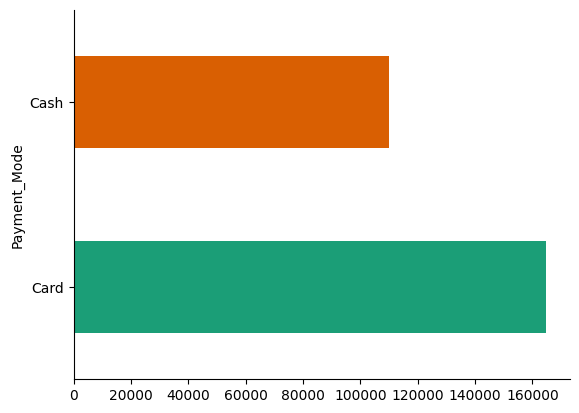

In [22]:
yellow_cab.groupby('Payment_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Payment_Mode'>

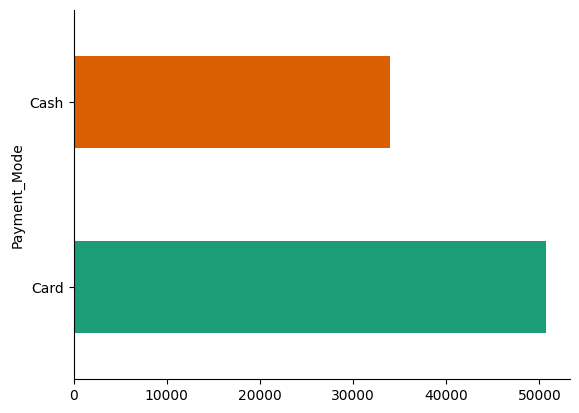

In [23]:
pink_cab.groupby('Payment_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

,Age,Gender,Monthly_Income
0,28,Male,10813
1,28,Male,10813
2,28,Male,10813
3,27,Male,9237
4,27,Male,9237
...,...,...,...
359387,29,Female,6829
359388,29,Female,6829
359389,29,Female,6829
359390,29,Female,6829


<Figure size 800x600 with 0 Axes>

<ipython-input-27-1a4acbec95fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_data, x='Gender', palette='pastel')


<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Count of Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

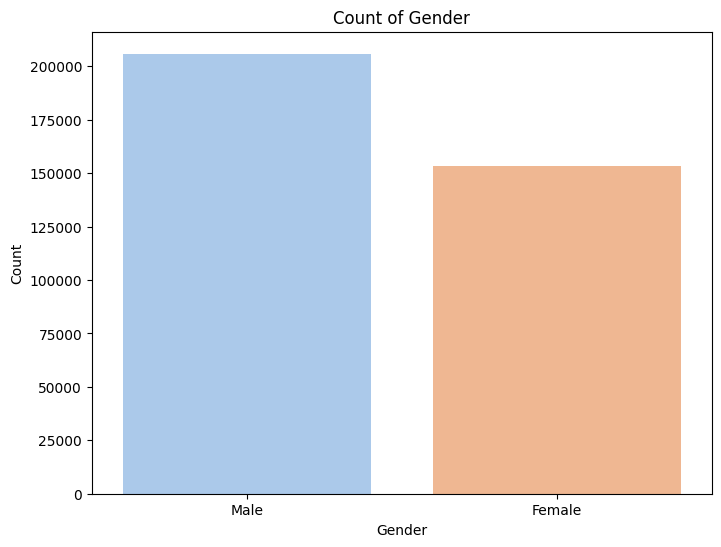

In [27]:
master_data[['Age','Gender','Monthly_Income']]

# Plot bar plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=master_data, x='Gender', palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



#Areas to investigate:
# 1.Which company has maximum cab users at a particular time period?



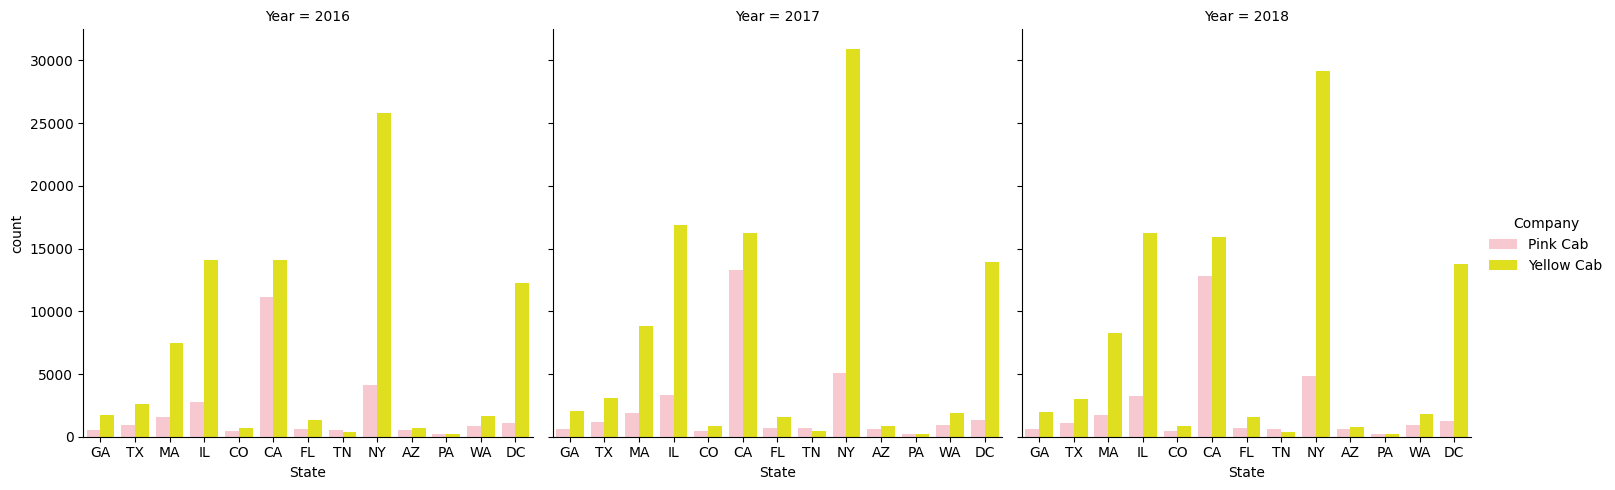

In [29]:
profit_plot = sns.catplot(data=master_data, x='State', kind='count',hue='Company',col='Year',palette=['Pink','Yellow'])

we can see that the yellow cab company has generated more profits in all the states when compared to Pink Cab

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Transactions')

Text(0.5, 1.0, 'Number of Transactions by Year')

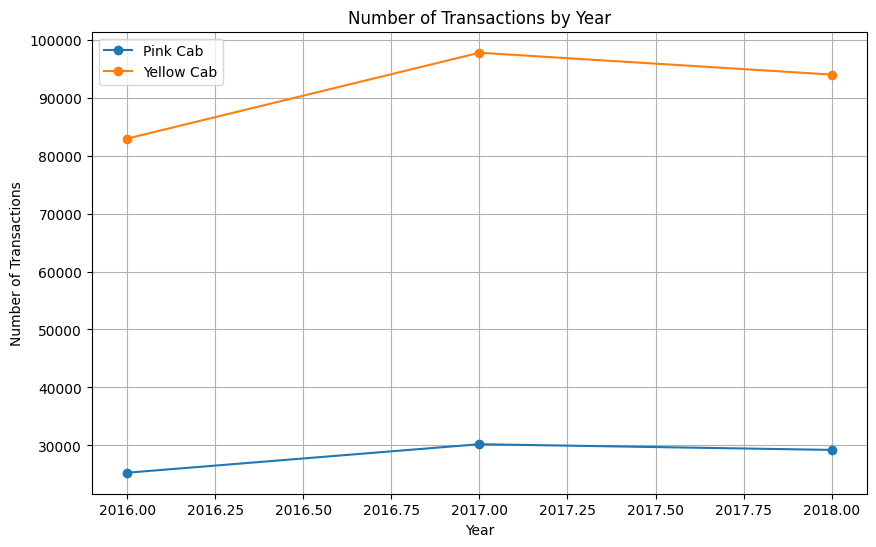

In [30]:
f_pink = master_data[master_data.Company=='Pink Cab'].groupby(['Year']).Transaction_ID.count()
f_yellow = master_data[master_data.Company=='Yellow Cab'].groupby(['Year']).Transaction_ID.count()
at_pink = master_data[master_data.Company=='Pink Cab'].groupby(['Year']).agg(Count=("Transaction_ID", 'count'))
at_yellow = master_data[master_data.Company=='Yellow Cab'].groupby(['Year']).agg(Count=("Transaction_ID", 'count'))

plt.figure(figsize=(10, 6))

plt.plot(f_pink.index, f_pink.values, marker='o', label='Pink Cab')
plt.plot(f_yellow.index, f_yellow.values, marker='o', label='Yellow Cab')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Year')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# 2.Does margin proportionally increase with increase in number of customers?

In [31]:
pink_cab[['KM_Travelled', 'Price_Charged','Cost_of_Trip','Profit','Profit_per_KM']].describe().applymap(lambda x: f"{x:0.1f}")
yellow_cab[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip','Profit','Profit_per_KM']].describe().applymap(lambda x: f"{x:0.1f}")

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Profit_per_KM
count,84711.0,84711.0,84711.0,84711.0,84711.0
mean,22.6,310.8,248.1,62.7,13.8
std,12.2,182.0,135.4,77.6,2.6
min,1.9,15.6,19.0,-220.1,6.3
25%,12.0,160.0,131.9,11.2,11.9
50%,22.4,298.1,246.3,41.5,13.4
75%,33.0,441.5,360.2,94.0,15.2
max,48.0,1623.5,576.0,1119.5,39.0


,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Profit_per_KM
count,274681.0,274681.0,274681.0,274681.0,274681.0
mean,22.6,458.2,297.9,160.3,20.3
std,12.2,288.4,162.5,171.8,5.7
min,1.9,20.7,22.8,-176.9,9.2
25%,12.0,226.7,158.4,37.2,15.8
50%,22.4,425.1,295.6,102.0,18.8
75%,33.0,633.9,432.4,228.7,24.1
max,48.0,2048.0,691.2,1464.0,54.0


<Figure size 700x500 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0, 0.5, 'Profit')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Yellow Cab Profit Margin')

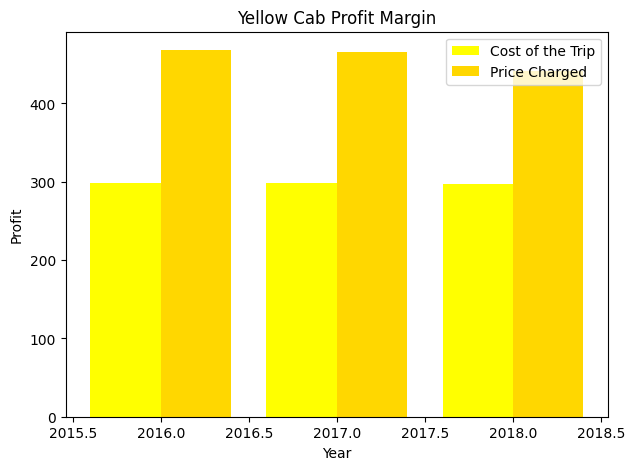

In [32]:
yellow_yearly_transactions = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
yellow_yearly_price = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
yellow_yearly_cost = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

ax.bar(yellow_yearly_transactions.index - 0.2, yellow_yearly_cost.values, width=0.4, color='Yellow', align='center', label='Cost of the Trip')
ax.bar(yellow_yearly_transactions.index + 0.2, yellow_yearly_price.values, width=0.4, color='gold', align='center', label='Price Charged')

ax.set_ylabel('Profit')
ax.set_xlabel('Year')
ax.set_title('Yellow Cab Profit Margin')
plt.legend()

plt.show()


<Figure size 700x500 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0, 0.5, 'Profit')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Pink Cab Profit Margin')

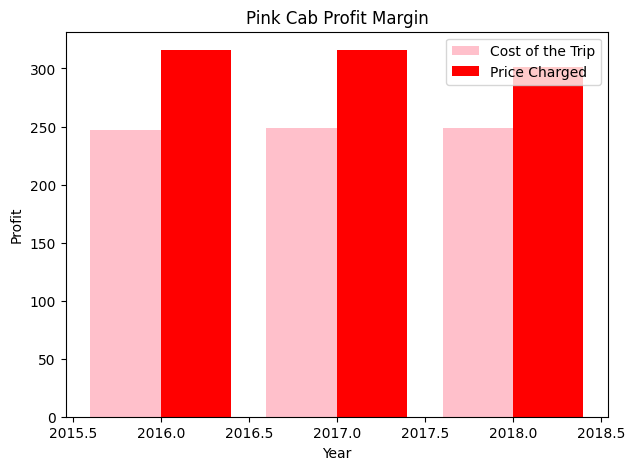

In [33]:
pink_yearly_transactions = master_data[master_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
pink_yearly_price = master_data[master_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
pink_yearly_cost = master_data[master_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

ax.bar(pink_yearly_transactions.index - 0.2, pink_yearly_cost.values, width=0.4, color='pink', align='center', label='Cost of the Trip')
ax.bar(pink_yearly_transactions.index + 0.2, pink_yearly_price.values, width=0.4, color='red', align='center', label='Price Charged')

ax.set_ylabel('Profit')
ax.set_xlabel('Year')
ax.set_title('Pink Cab Profit Margin')
plt.legend()

plt.show()

# 3.What are the attributes of these customer segments?

<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

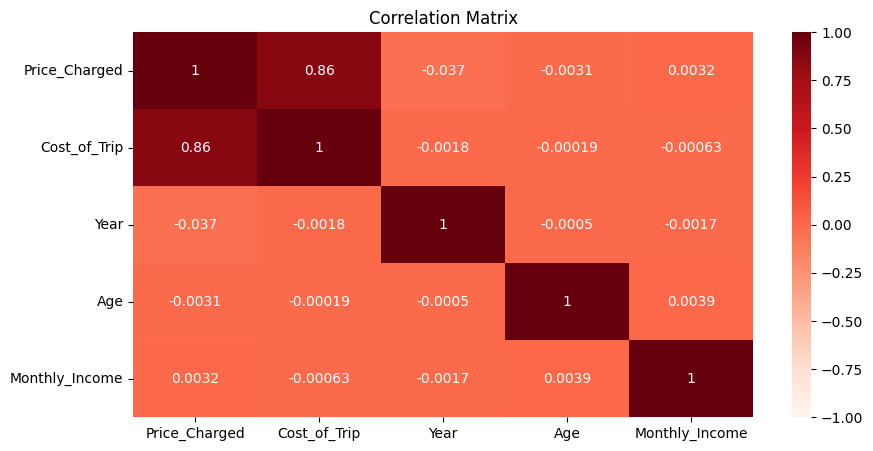

In [41]:
# Selecting the columns of interest
HP = master_data[['Price_Charged', 'Cost_of_Trip', 'Year', 'Age', 'Monthly_Income']]

# Calculating the correlation matrix
correlation_matrix = HP.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()


In [42]:
master_data.to_csv('Master.scv',index=False)